
# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,867 movies collected from The Movie Database (TMDb), including user ratings, budget and revenue.
> I am planning to analyze this dataset and get answers to the below questions, 
<ul>
 <li> What are the Top 15 movies whose budget was among the highest but revenue was among the least ? (Least Profitable Movies) </li>
 <li> What are the Top 15 movies whose budget was among the least but revenue was among the highest ? (Most Profitable Movies)</li>
 <li> In which year we had most no.of profitable movies ? </li>
 <li> Are movies with higher vote count more popular among audience? </li>
 <li> What are the most successful genres ? </li>
 <li> How is the trend of top 5 genres with respect to time ? </li>
 <ul>

In [1]:
#First, let's import all the necessary libraries and Packages needed for Accessing, Wrangling & Analysing the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we've loaded the data, and checking it for cleanliness, and then triming and cleaning our dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()   

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#Finding the full summary of the dataset
df_tmdb.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> With **info** command we found that the total row entries should be 10866. However, looking at inidividual columns which are supposed to be non null but have total entries less than 10866 which means that there are some null values present in those columns. 

In [4]:
# Get insights about data points
df_tmdb.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256B54E3A48>,
      dtype=object)

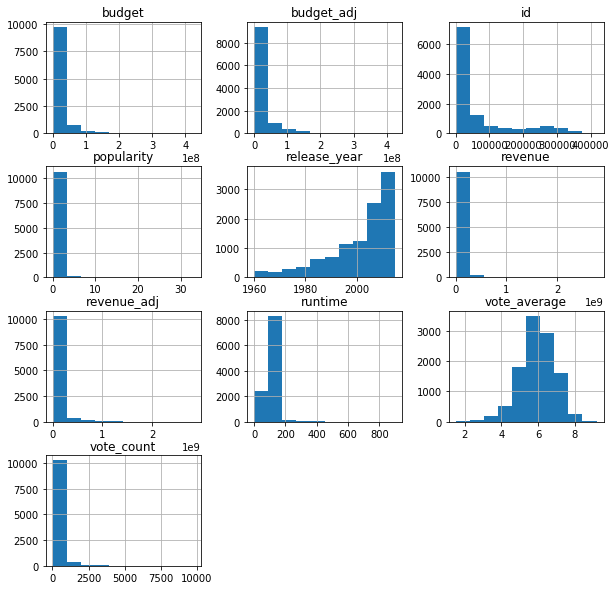

In [5]:
# Find out if any numerical columns have 0 volues
df_tmdb.hist(figsize=(10,10))

> As mentioned above, **info** revealed that certain columns such us revenue, release_year, etc. have inconsistencies in data. Also, **describe()** and **hist** commands indicated that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, we'll change the 0 values in columns like "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" into "NaN" for avoiding discrepancies and therby generating clean data for the analysis.

In [6]:
#Getting more details about those columns which are relevant for my observation
rows, cols = df_tmdb.query('revenue == 0').shape
print('There are {} rows with 0 revenue'.format(rows))

rows, cols = df_tmdb.query('budget == 0').shape
print('There are {} rows with 0 budget'.format(rows))

There are 6016 rows with 0 revenue
There are 5696 rows with 0 budget


In [7]:
#Checking if there are any duplicate rows in dataframe
sum(df_tmdb.duplicated())

1

> **Note**: We noticed a couple of issues by doing initial inspection of the data. 
 <ol>
    <li> When we ran the "info" command, we found that there are null values in some columns like homepage, tagline etc </li>
    <li> When we ran the "describe" and "hist" command, we found that the min value or value is 0 for some columns like budget, revenue and runtime which is not expected. So we ran "query" to confirm the same" </li>
    <li> Also, we found that there are few columns like Cast, Genres, Production_Companies in which data is separated via '|'. This needs to be cleaned too </li>
    <li> There are some columns like imdb_id, homepage, overview, tagline which are not needed for analysis. So we can drop those columns </li>
    <li> Remove duplicate rows if any </li>

### Data Cleaning

> **1.** Filling columns having rows with **0** values with **NaN** and then dropping them

In [8]:
# filling 0 values with NaN
zero_cols = ['budget','revenue','runtime','budget_adj', 'revenue_adj']
df_tmdb[zero_cols] = df_tmdb[zero_cols].replace(0, np.NAN)


In [9]:
#dropping relevant rows with null values
df_tmdb.dropna(axis = 0, inplace = True)

#checking if there are still any null values left, should print False
df_tmdb.isnull().sum().any()

False

> **2.** Melting down the dataframe for columns delimited by '|'

In [10]:
#Splitting the columns containing values with seperation '|'
df_cast = (df_tmdb['cast'].str.split('|', expand = True).rename(columns = lambda x:f"cast_{x+1}"))
df_genres = (df_tmdb['genres'].str.split('|', expand = True).rename(columns = lambda x:f"genres_{x+1}"))
df_director = (df_tmdb['director'].str.split('|', expand = True).rename(columns = lambda x:f"director_{x+1}"))

In [11]:
#Now joining the dataframes - df_cast, df_genres, df_director
df_tmdb = pd.concat([df_tmdb, df_cast, df_genres, df_director], axis = 1)
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres_2,genres_3,genres_4,genres_5,director_1,director_2,director_3,director_4,director_5,director_6
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Adventure,Science Fiction,Thriller,None,Colin Trevorrow,None,None,None,None,None
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Adventure,Science Fiction,Thriller,None,George Miller,None,None,None,None,None
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Science Fiction,Thriller,None,None,Robert Schwentke,None,None,None,None,None
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Adventure,Science Fiction,Fantasy,None,J.J. Abrams,None,None,None,None,None
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Crime,Thriller,None,None,James Wan,None,None,None,None,None


In [12]:
#Dropping all the irrelevant rows and columns from the dataset
df_tmdb.drop (['imdb_id', 'cast', 'homepage', 'tagline','keywords', 'overview','genres','director'], axis=1, inplace=True)
df_tmdb.drop_duplicates(inplace = True)
df_tmdb.shape

(1287, 29)

> After data cleaning step, we are left with 1287 rows and 29 columns for our analysis. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the Top 10 movies whose budget was among the highest but revenue was among the least (Least Profitable Movies) ?

> To identify least and most profitable movies, we need to calculate difference between **revenue** and **budget** for each row. The rows with least difference will give the most profitable movies and vice versa. So we decided to create a new column as **profit** that could store this difference and then sorting this column to get the corresponding records. 

In [13]:
# Step 1) Creating a new column i.e. Profit(Revenue-Budget) in the dataframe. 
df_tmdb['profit'] = df_tmdb['revenue'] - df_tmdb['budget']
df_tmdb.shape

(1287, 30)

In [14]:
#Step 2) Sorting the dataframe in increasing order of profitable movies
df_tmdb.sort_values('profit')

,id,popularity,budget,revenue,original_title,runtime,production_companies,release_date,vote_count,vote_average,...,genres_3,genres_4,genres_5,director_1,director_2,director_3,director_4,director_5,director_6,profit
2244,46528,0.250540,425000000.0,1.108757e+07,The Warrior's Way,100.0,Boram Entertainment Inc.,12/2/2010,74,6.4,...,Action,Western,Thriller,Sngmoo Lee,None,None,None,None,None,-4.139124e+08
5508,57201,1.214510,255000000.0,8.928991e+07,The Lone Ranger,149.0,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,1607,6.0,...,Western,None,None,Gore Verbinski,None,None,None,None,None,-1.657101e+08
3484,50321,0.921653,150000000.0,3.899276e+07,Mars Needs Moms,88.0,Walt Disney Animation Studios,3/9/2011,129,5.5,...,Family,None,None,Simon Wells,None,None,None,None,None,-1.110072e+08
6590,11619,1.390297,149000000.0,6.445932e+07,Flushed Away,85.0,Aardman Animations|DreamWorks Animation,10/22/2006,488,6.0,...,Comedy,Family,None,David Bowers,Sam Fell,None,None,None,None,-8.454068e+07
6309,10077,0.626900,80000000.0,5.989640e+06,A Sound of Thunder,110.0,Epsilon Motion Pictures|Franchise Pictures|Bal...,5/15/2005,58,4.8,...,Adventure,Action,None,Peter Hyams,None,None,None,None,None,-7.401036e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,...,Thriller,None,None,James Wan,None,None,None,None,None,1.316249e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,...,Science Fiction,Thriller,None,Colin Trevorrow,None,None,None,None,None,1.363529e+09
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,194.0,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,...,Thriller,None,None,James Cameron,None,None,None,None,None,1.645034e+09
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,...,Science Fiction,Fantasy,None,J.J. Abrams,None,None,None,None,None,1.868178e+09


>**N.B:** We noticed that some columns like **budget** & **revenue** are displayed in scientific format with exponential due to which the sorting results in **profit** column were not accurate. So, we ran the below command.

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df_tmdb.head()

,id,popularity,budget,revenue,original_title,runtime,production_companies,release_date,vote_count,vote_average,...,genres_3,genres_4,genres_5,director_1,director_2,director_3,director_4,director_5,director_6,profit
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,124.00,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.50,...,Science Fiction,Thriller,None,Colin Trevorrow,None,None,None,None,None,1363528810.00
1,76341,28.42,150000000.00,378436354.00,Mad Max: Fury Road,120.00,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.10,...,Science Fiction,Thriller,None,George Miller,None,None,None,None,None,228436354.00
2,262500,13.11,110000000.00,295238201.00,Insurgent,119.00,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.30,...,Thriller,None,None,Robert Schwentke,None,None,None,None,None,185238201.00
3,140607,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,136.00,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.50,...,Science Fiction,Fantasy,None,J.J. Abrams,None,None,None,None,None,1868178225.00
4,168259,9.34,190000000.00,1506249360.00,Furious 7,137.00,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.30,...,Thriller,None,None,James Wan,None,None,None,None,None,1316249360.00


In [16]:
#Step 3) Extracting Top 15 Least Profitable Movies in a dataframe
df_top15_least=df_tmdb.nsmallest(15, 'profit')
df_top15_least.head(20)

,id,popularity,budget,revenue,original_title,runtime,production_companies,release_date,vote_count,vote_average,...,genres_3,genres_4,genres_5,director_1,director_2,director_3,director_4,director_5,director_6,profit
2244,46528,0.25,425000000.00,11087569.00,The Warrior's Way,100.00,Boram Entertainment Inc.,12/2/2010,74,6.40,...,Action,Western,Thriller,Sngmoo Lee,None,None,None,None,None,-413912431.00
5508,57201,1.21,255000000.00,89289910.00,The Lone Ranger,149.00,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/2013,1607,6.00,...,Western,None,None,Gore Verbinski,None,None,None,None,None,-165710090.00
3484,50321,0.92,150000000.00,38992758.00,Mars Needs Moms,88.00,Walt Disney Animation Studios,3/9/2011,129,5.50,...,Family,None,None,Simon Wells,None,None,None,None,None,-111007242.00
6590,11619,1.39,149000000.00,64459316.00,Flushed Away,85.00,Aardman Animations|DreamWorks Animation,10/22/2006,488,6.00,...,Comedy,Family,None,David Bowers,Sam Fell,None,None,None,None,-84540684.00
6309,10077,0.63,80000000.00,5989640.00,A Sound of Thunder,110.00,Epsilon Motion Pictures|Franchise Pictures|Bal...,5/15/2005,58,4.80,...,Adventure,Action,None,Peter Hyams,None,None,None,None,None,-74010360.00
2071,42888,0.64,120000000.00,48668907.00,How Do You Know,121.00,Columbia Pictures|Gracie Films|Road Rebel,12/17/2010,136,4.90,...,Romance,None,None,James L. Brooks,None,None,None,None,None,-71331093.00
5469,49524,1.69,130000000.00,61648500.00,R.I.P.D.,96.00,Universal Pictures|Original Film|Dark Horse En...,7/18/2013,876,5.30,...,Comedy,Crime,None,Robert Schwentke,None,None,None,None,None,-68351500.00
4859,116977,0.11,65000000.00,73706.00,Foodfight!,87.00,Threshold Entertainment|Lions Gate Family Ente...,6/15/2012,12,2.20,...,Comedy,Family,None,Lawrence Kasanoff,None,None,None,None,None,-64926294.00
8999,10153,1.15,75000000.00,13100000.00,Sphere,134.00,Punch Productions|Warner Bros.|Baltimore Pictu...,2/13/1998,238,5.60,...,None,None,None,Barry Levinson,None,None,None,None,None,-61900000.00
2747,12610,0.44,75000000.00,13596911.00,Osmosis Jones,95.00,Conundrum Entertainment|Warner Bros. Animation...,8/7/2001,128,5.60,...,Action,Comedy,Family,Bobby Farrelly,Peter Farrelly,None,None,None,None,-61403089.00


> We decided to use the **Line Chart** as we wanted to show the trend of least profitable movies given in dataset.

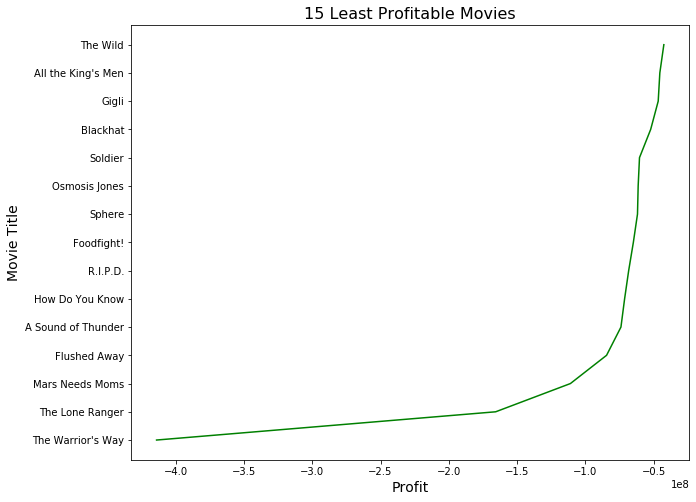

In [17]:
#Step 4) Plotting the Data with line chart
plt.figure(figsize=(10,8))
plt.plot(df_top15_least['profit'],df_top15_least['original_title'], color='g')
plt.title('15 Least Profitable Movies',fontsize=16)
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Movie Title', fontsize=14);

> It can be observered that **The Warrior's Way** is the least profitable movie whose revenue earned was quite less than the budget. 

### Research Question 2 : What are the Top 15 movies whose budget was among the least but revenue was among the highest ? (Most Profitable Movies)

In [18]:
#Step 1) Extracting Top 15 Most Profitable Movies in the dataframe
df_top15_most=df_tmdb.nlargest(15, 'profit')
df_top15_most.head(20)

,id,popularity,budget,revenue,original_title,runtime,production_companies,release_date,vote_count,vote_average,...,genres_3,genres_4,genres_5,director_1,director_2,director_3,director_4,director_5,director_6,profit
1386,19995,9.43,237000000.00,2781505847.00,Avatar,162.00,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.10,...,Fantasy,Science Fiction,None,James Cameron,None,None,None,None,None,2544505847.00
3,140607,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,136.00,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.50,...,Science Fiction,Fantasy,None,J.J. Abrams,None,None,None,None,None,1868178225.00
5231,597,4.36,200000000.00,1845034188.00,Titanic,194.00,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.30,...,Thriller,None,None,James Cameron,None,None,None,None,None,1645034188.00
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,124.00,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.50,...,Science Fiction,Thriller,None,Colin Trevorrow,None,None,None,None,None,1363528810.00
4,168259,9.34,190000000.00,1506249360.00,Furious 7,137.00,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.30,...,Thriller,None,None,James Wan,None,None,None,None,None,1316249360.00
4361,24428,7.64,220000000.00,1519557910.00,The Avengers,143.00,Marvel Studios,4/25/2012,8903,7.30,...,Adventure,None,None,Joss Whedon,None,None,None,None,None,1299557910.00
3374,12445,5.71,125000000.00,1327817822.00,Harry Potter and the Deathly Hallows: Part 2,130.00,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/2011,3750,7.70,...,Fantasy,None,None,David Yates,None,None,None,None,None,1202817822.00
14,99861,5.94,280000000.00,1405035767.00,Avengers: Age of Ultron,141.00,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/2015,4304,7.40,...,Science Fiction,None,None,Joss Whedon,None,None,None,None,None,1125035767.00
5422,109445,6.11,150000000.00,1274219009.00,Frozen,102.00,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/2013,3369,7.50,...,Family,None,None,Chris Buck,Jennifer Lee,None,None,None,None,1124219009.00
8,211672,7.40,74000000.00,1156730962.00,Minions,91.00,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.50,...,Adventure,Comedy,None,Kyle Balda,Pierre Coffin,None,None,None,None,1082730962.00


> Here, we are using **Line Chart** to analyse the trend of profits earned by different movies and find the most Profitable Movie.

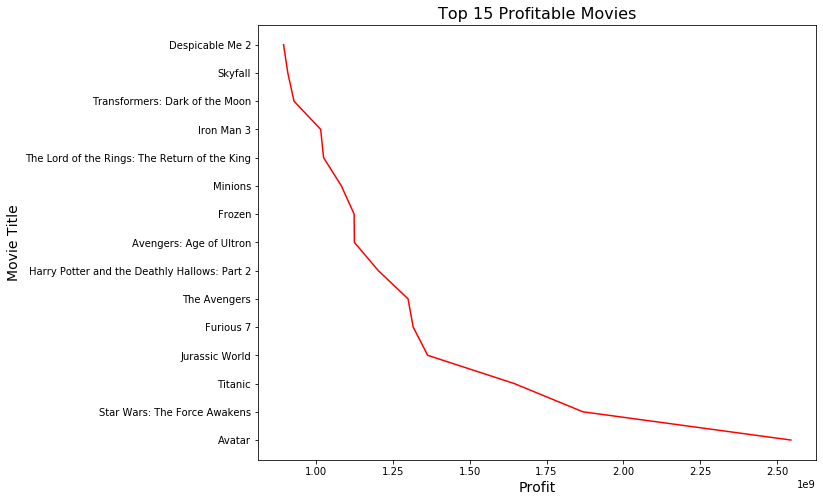

In [19]:
#Step 2) Plotting the Data
plt.figure(figsize=(10,8))
plt.plot(df_top15_most['profit'],df_top15_most['original_title'], color='r')
plt.title('Top 15 Profitable Movies',fontsize=16)
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Movie Title', fontsize=14);

>As evident here, **Avatar** is the most profitable movie with maximum profit earned as compared to any other movie given in dataset.

### Research Question 3 : In which year we had most no.of profitable movies ?

> For finding the most profitable year, we will be using **Bar Chart** and plot the change in profit with respect to year.

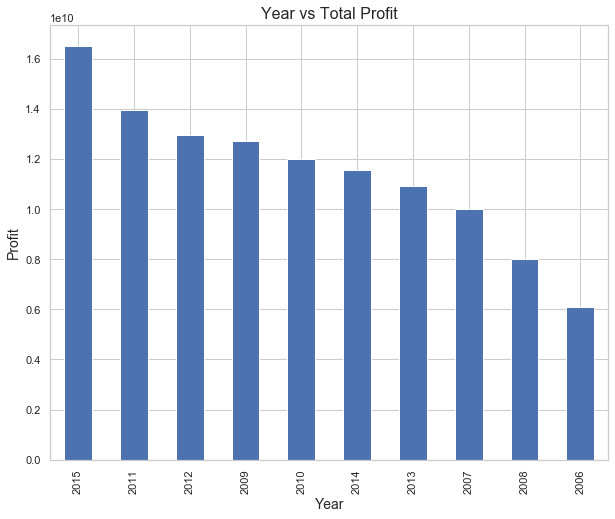

In [21]:
#Finding year in which we had maximum number of profitable movies by using groupby command to compare release_year with profit earned & plotting it.
df_tmdb.groupby('release_year')['profit'].sum().sort_values(ascending = False).head(10).plot(kind='bar')
sb.set(rc={'figure.figsize':(16,10)})
sb.set_style('whitegrid')
plt.title('Year vs Total Profit' ,fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Profit', fontsize=14);

> Comparing 10 year data of movies from year 2006 to 2015, we found that **year 2015** had the maximum profitable movies.

### Research Question 4: Are movies with higher vote count more popular among audience? 

> We are using **corr** command to understand the correlation between vote count and popularity. 

In [22]:
#Running 'corr' to detect correlation between variables
df_tmdb.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,1.00,0.19,-0.05,-0.03,-0.01,0.06,0.00,0.49,-0.12,-0.10,-0.02
popularity,0.19,1.00,0.43,0.59,0.32,0.74,0.36,0.06,0.42,0.55,0.58
budget,-0.05,0.43,1.00,0.71,0.34,0.58,0.08,0.18,0.99,0.57,0.57
revenue,-0.03,0.59,0.71,1.00,0.37,0.78,0.30,0.03,0.71,0.91,0.98
runtime,-0.01,0.32,0.34,0.37,1.00,0.43,0.39,-0.07,0.36,0.37,0.35
vote_count,0.06,0.74,0.58,0.78,0.43,1.00,0.46,0.07,0.57,0.70,0.75
vote_average,0.00,0.36,0.08,0.30,0.39,0.46,1.00,-0.16,0.09,0.32,0.33
release_year,0.49,0.06,0.18,0.03,-0.07,0.07,-0.16,1.00,0.06,-0.23,-0.01
budget_adj,-0.12,0.42,0.99,0.71,0.36,0.57,0.09,0.06,1.00,0.61,0.58
revenue_adj,-0.10,0.55,0.57,0.91,0.37,0.70,0.32,-0.23,0.61,1.00,0.92


>**N.B** Popularity and vote count seems to be strongly correlated. To deduce how these variables (Vote count & Popularity) are related to each other, we will be using **Scatter Plot**.

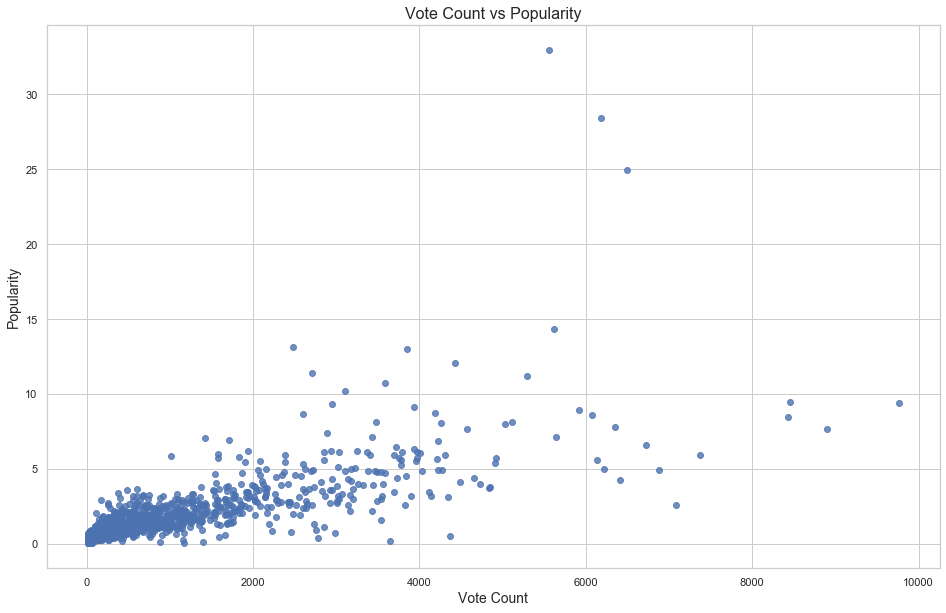

In [23]:
#Plotting the columns 'vote_count' & 'popularity' needed for the analysis 
sb.regplot(x = df_tmdb['vote_count'], y = df_tmdb['popularity'], fit_reg = False)
plt.title('Vote Count vs Popularity', fontsize = 16)
plt.xlabel('Vote Count', fontsize = 14)
plt.ylabel('Popularity', fontsize = 14);


### Research Question 5: Most Successful Genres ?

In [24]:
#Step 1) Calculating genre count for each movie
df_genres = df_tmdb[["genres_1","genres_2","genres_3", "genres_4","genres_5"]]
count = df_genres.stack().value_counts()

> To analyse the most successful genre, we are using **Horizontal Bar Chart** to compare independent values of all the genres.

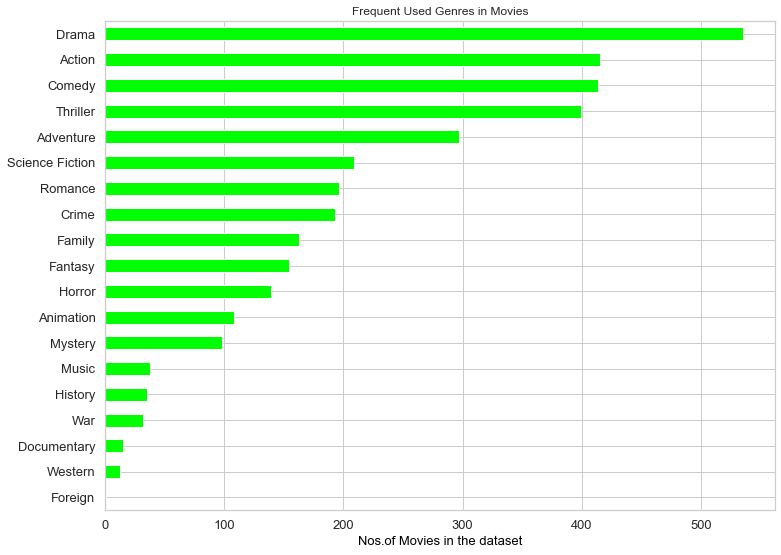

In [25]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

> We found that **Drama** is the most frequently used Genre for movies with value of ~540

### Research Question 6: Trend of Top 5 Genres with respect to Year ?

In [26]:
# Here, we can change release_year to categorical variable (so it is always included)
#First, creating sorted list of years
year_order = sorted(df_tmdb.release_year.unique())
#Now, creating ordered categorical variable
df_tmdb['release_year'] = pd.Categorical(df_tmdb['release_year'], categories = year_order, ordered = True)

In [27]:
#selecting columns that we need for analysis
genre_years = df_tmdb[["genres_1","genres_2","genres_3", "genres_4","genres_5","release_year"]]

#create single column from genres column
genre_cols_df = pd.melt(genre_years, id_vars = ['release_year'])
genre_cols_df.head()

,release_year,variable,value
0,2015,genres_1,Action
1,2015,genres_1,Action
2,2015,genres_1,Adventure
3,2015,genres_1,Action
4,2015,genres_1,Action


In [28]:
#now we need to count the number of observations
genre_cols_df.groupby(['release_year','value']).size()

release_year  value          
1961          Action              0
              Adventure           0
              Animation           0
              Comedy              1
              Crime               0
                                 ..
2015          Romance             9
              Science Fiction    22
              Thriller           32
              War                 2
              Western             2
Length: 969, dtype: int64

In [29]:
#unstack moves a row index to a column index
genre_rows_df = genre_cols_df.groupby(['release_year', 'value']).size().unstack()
genre_rows_df.head()

value,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1961,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1963,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1964,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1965,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


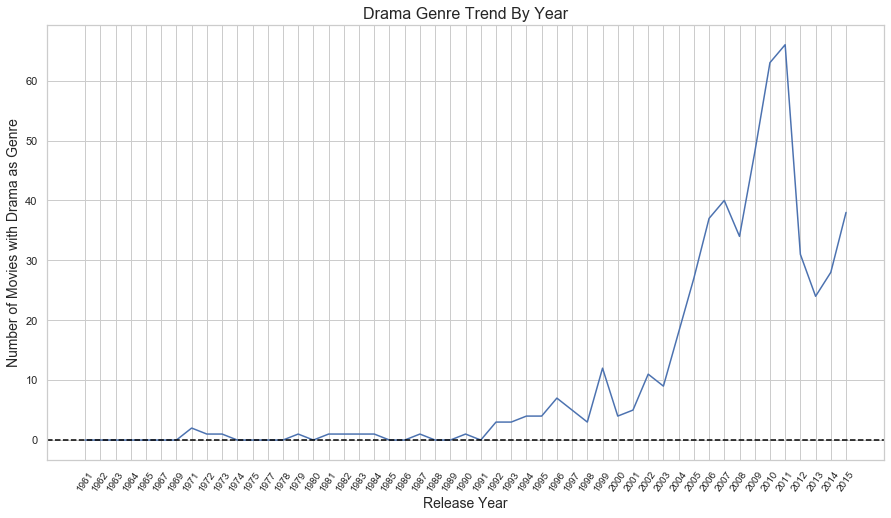

In [30]:
#plotting the columns
plt.figure(figsize=(15,8))
genre_rows_df.Drama.plot()
ax = plt.gca()
plt.setp(ax.get_xticklabels(), visible = True)
plt.xticks(range(len(genre_rows_df)) ,year_order, size = 'small', rotation=55);
plt.axhline(0,color= 'black',ls = '--');
plt.title('Drama Genre Trend By Year',fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies with Drama as Genre', fontsize=14);

> Starting from year 1961, trend of Drama genre is increasing swiftly with a hike in year 2011.

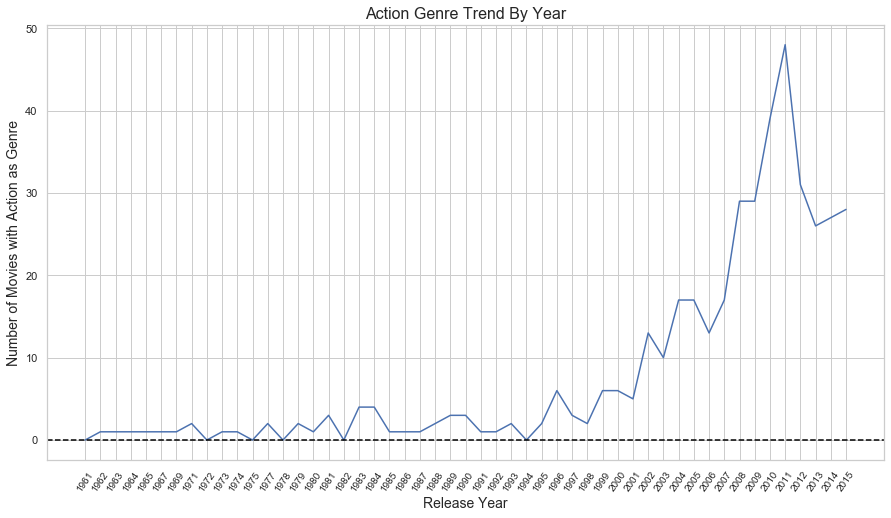

In [31]:
#plotting the columns
plt.figure(figsize=(15,8))
genre_rows_df.Action.plot()
ax = plt.gca()
plt.setp(ax.get_xticklabels(), visible = True)
plt.xticks(range(len(genre_rows_df)) ,year_order, size = 'small', rotation=55);
plt.axhline(0,color= 'black',ls = '--');
plt.title('Action Genre Trend By Year',fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies with Action as Genre', fontsize=14);

> From the plotting above, we can conclude that Action genre has been continuously in production starting from year 1961, with a high leap in likeness towards genre since 2006 onwards.

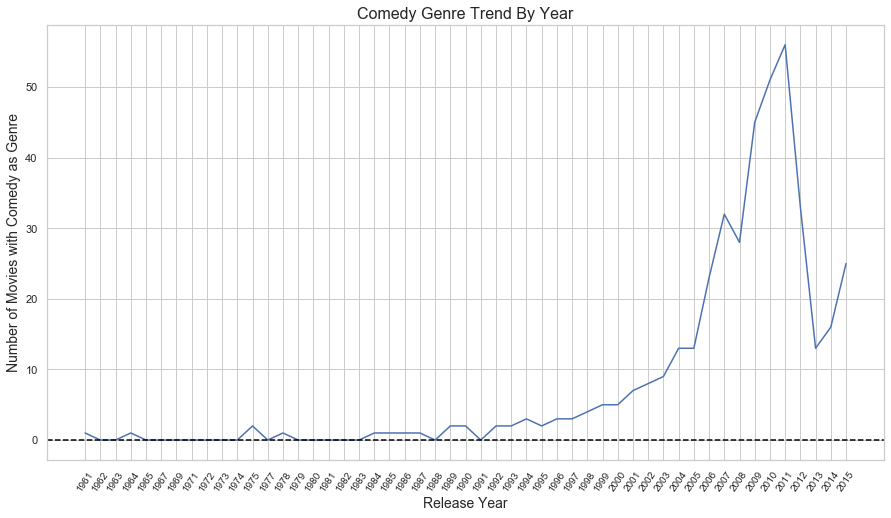

In [32]:
#plotting the columns
plt.figure(figsize=(15,8))
genre_rows_df.Comedy.plot()
ax = plt.gca()
plt.setp(ax.get_xticklabels(), visible = True)
plt.xticks(range(len(genre_rows_df)) ,year_order, size = 'small', rotation=55);
plt.axhline(0,color= 'black',ls = '--');
plt.title('Comedy Genre Trend By Year',fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies with Comedy as Genre', fontsize=14);

> We can deduce that, trend of **Comedy** genre is gradually increasing since year 1991. But there is sharp decline (from no. of movies produced : ~55 - 10) in production of comedy movies in year 2011.

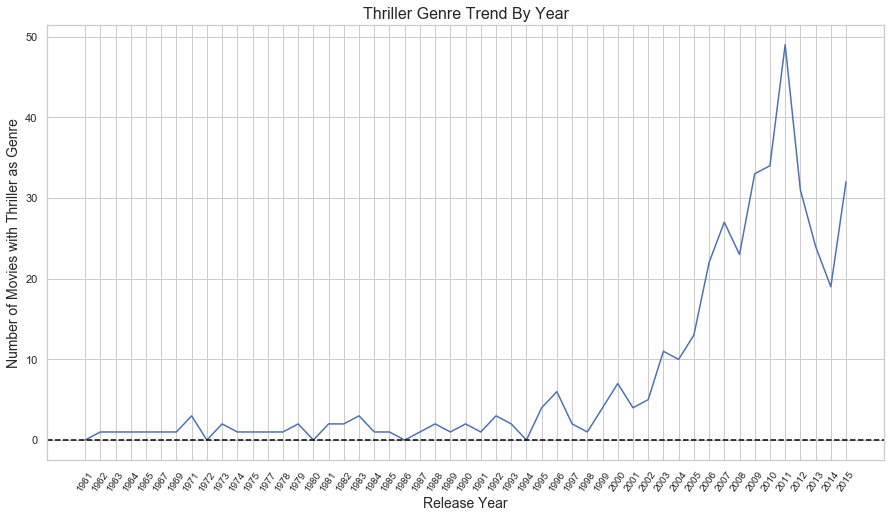

In [33]:
#plotting the columns
plt.figure(figsize=(15,8))
genre_rows_df.Thriller.plot()
ax = plt.gca()
plt.setp(ax.get_xticklabels(), visible = True)
plt.xticks(range(len(genre_rows_df)) ,year_order, size = 'small', rotation=55);
plt.axhline(0,color= 'black',ls = '--');
plt.title('Thriller Genre Trend By Year',fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies with Thriller as Genre', fontsize=14);

> Thriller genre movies has been in production since 1961. It can be analysed that just like Action movies, Thriller genre has also been more likely in production ever since. 

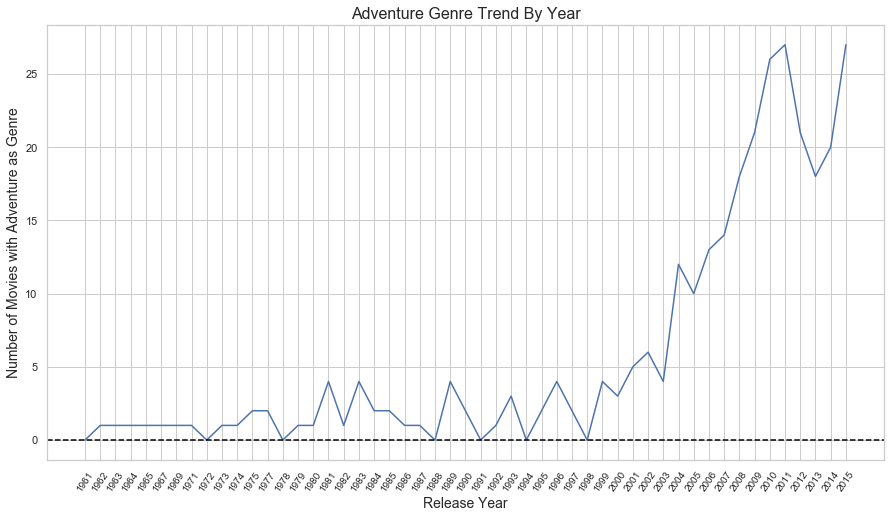

In [34]:
#plotting the columns
plt.figure(figsize=(15,8))
genre_rows_df.Adventure.plot()
ax = plt.gca()
plt.setp(ax.get_xticklabels(), visible = True)
plt.xticks(range(len(genre_rows_df)) ,year_order, size = 'small', rotation=55);
plt.axhline(0,color= 'black',ls = '--');
plt.title('Adventure Genre Trend By Year',fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies with Adventure as Genre', fontsize=14);

> Here, we can conclude about the trend of Adventure genre as likeable for production with few dips in the starting years.

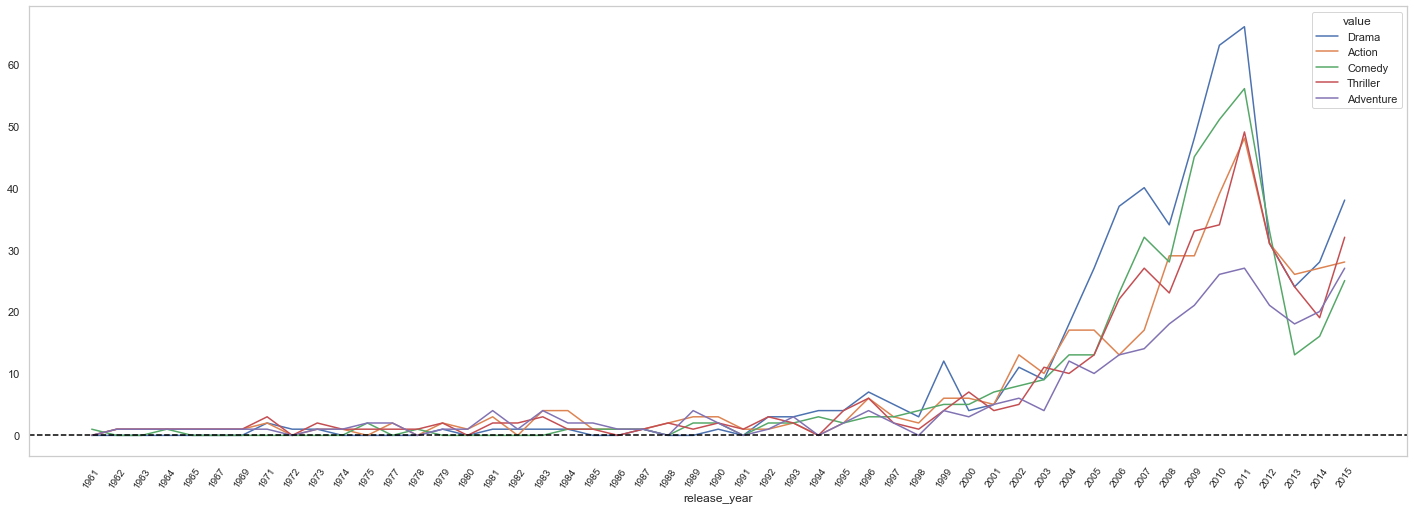

In [35]:
#To see comparison of all the genres together, we can plot all the graphs together
genre_rows_df[['Drama','Action','Comedy','Thriller','Adventure']].plot(grid= False, figsize = [24.7,8.27]);

#x-ticks for categorical variable
ax = plt.gca()
plt.setp(ax.get_xticklabels(), visible = True)
plt.xticks(range(len(genre_rows_df)) ,year_order, size = 'small', rotation=55)
plt.axhline(0,color= 'black',ls = '--');

> From the cumulative projection above, we can summarise by saying that though **Drama** Genre wasn't trending in early 1960s as compared to other Genres, but eventually it became the most produced genre by production companies.

# <a id='conclusions'></a>
## Conclusions

> This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:<ol>
    <li>The Warrior's Way is the least profitable movie while Avatar is the most profitable movie. </li>
    <li>Between 2006-2015, we had the most number of profitable movies in 2015 and we had the least number of profitable movies in 2006. </li>
    <li>Also, we explored that there was a huge jump in profit earned by movies from year 2014 to year 2015. </li>
    <li>Users tend to vote more for the popular movies. All the more, movies that were profitable are highly popular among users. </li>
    <li>Most Frequently used Genre in movies is Drama while movies belonging to War or documentaries are rarely produced. </li>     <li>For a movie to be successful, Genre must be : Drama, Action, Comedy, Thriller, Adventure. </li>
    <li>All these genres started gaining huge popularity between 2000-2010. Then the popularity dropped for a while, but soon started rising again. </li>
    <li>There is a sharp decline in comedy movies from year 2010 to ~2011 as compared to other genres. </li>


## Limitations<ol>
<li> Our data analysis results are limited to the tmdb movies data set downloaded from kaggle. We are not sure if the data provided to us is up to date, so the results can only be treated as indicators and can not be generalized.</li>
<li> We calculated profit using budget and revenue column. However, there is no currency mentioned for those columns which limits our analysis to the assumption that all values are in common currency.</li>
<li> We dropped the rows with 0 or NaN values (for ex, budget and revenue with 0 values) that also affected the overall analysis.</li> 
<li> There is no statistical inference performed in our analysis to test the significance of the results that we found.</li>
</ol>